# Algoritmos, Convergencia, Estabilidad

## Algoritmo inestable

Calcular la integral

$$
y_n = \int_{0}^{1} \frac{x^n}{x+5} dx
$$

para $n = 0, 1, 2, 3, \dots$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import macti.visual as mvis

In [4]:
def dyn(x, n):
    return x**n / (x + 5)

In [5]:
# ¿Qué pasa cuando n = 0?
n = 0
x = np.linspace(0,1,20)
y = dyn(x,n)

In [6]:
print(x)
print(y)

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.2        0.19791667 0.19587629 0.19387755 0.19191919 0.19
 0.18811881 0.18627451 0.18446602 0.18269231 0.18095238 0.17924528
 0.17757009 0.17592593 0.17431193 0.17272727 0.17117117 0.16964286
 0.16814159 0.16666667]


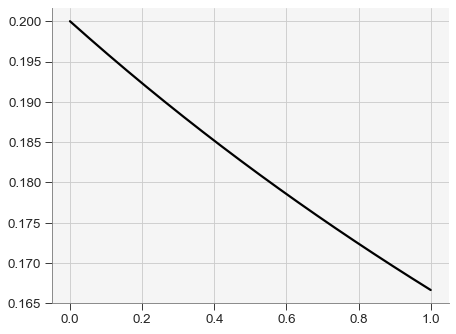

In [7]:
plt.plot(x,y)

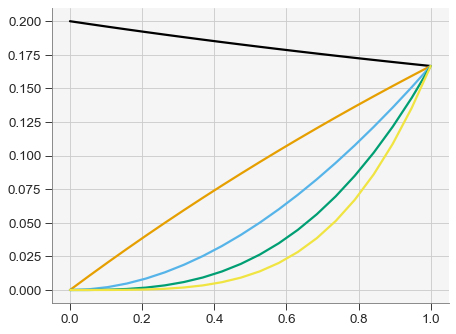

In [8]:
# ¿Qué pasa cuando n = 0,1,2,3,4, ...?
for n in range(0,5):
    plt.plot(x, dyn(x,n))

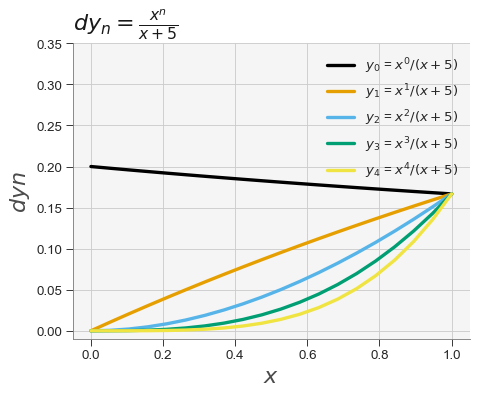

In [9]:
# Decoramos la gráfica ;)
#plt.figure(figsize=(10,5))
for n in range(0,5):
    plt.plot(x, dyn(x,n), lw = 3, label='$y_{}$ = $x^{} / (x + 5)$'.format(n, n))

plt.title(r'$dy_n = \frac{x^n}{x + 5}$', fontsize=20)
plt.xlabel('$x$', fontsize=20)
plt.ylabel('$dyn$', fontsize=20)
plt.ylim(-0.01,0.35)
plt.legend(loc='best', ncol=1)
plt.show()

Calcular la integral usando el siguiente algoritmo:

$$
y_n + 5 y_{n-1} =  \frac{1}{n}
$$

Cuando $n=0$ y redondeando a tres cifras:

$$
y_0 = \int_{0}^{1} \frac{1}{x+5} dx = \big[\ln(x+5)\big]_0^1 = \ln 6 - \ln 5 \approx 0.182
$$

$y_0$ es nuestra condición inicial.

In [73]:
# Implementación del algoritmo

# r es el número de cifras significativas
r = 3

# y0 es la condición inicial
y0 = round(np.log(6) - np.log(5), r)

# Función que implementa el algoritmo.
def inestable(y, n):
    return round((1.0 / n - 5 * y[n-1]), r)

# Metemos la solución en una lista. 
# El primer valor es la condición inicial.
y = [y0]

# N es el número de iteraciones
N = 5

# Cálculamos las integrales de 1 a N-1 y guardamos el resultado en la lista.
for i in range(1,N):
    y.append(inestable(y, i))

print(y)

# Impresión bonita
#y_nice = []
#for i in y:
#    y_nice.append(format(i, '1.'+str(r)+'f'))
#_ = [print('y[{:>2}] = {}'.format(i,y_nice[i])) for i in range(N)]

[0.182, 0.09, 0.05, 0.083, -0.165]


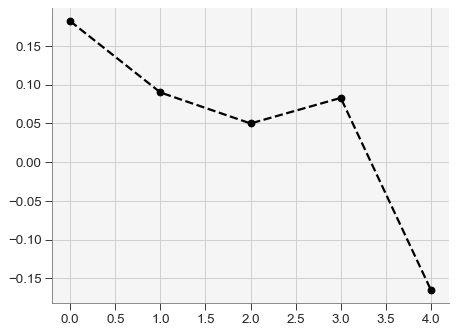

In [74]:
# Veamos el valor de las integrales gráficamente
plt.plot(y, 'o--')
plt.show()

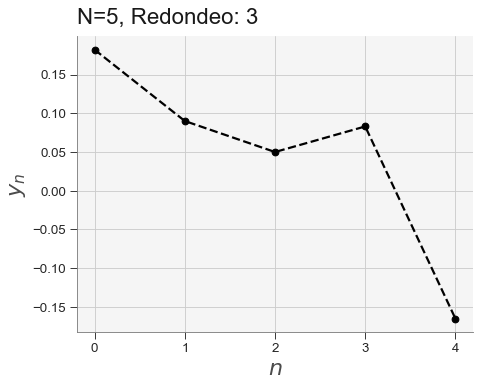

In [75]:
plt.plot(y, 'o--')
plt.title('N={}, Redondeo: {}'.format(N,r), fontsize = 20)
plt.xticks([i for i in range(N)])
plt.ylabel('$y_n$',fontsize=20)
plt.xlabel('$n$', fontsize=20)
plt.yticks(fontsize=12)
plt.show()

## Algoritmo condicionalmente estable

La siguiente ODE:
$$
\frac{d}{dt}y(t) = -a y(t), \,\,\,\,\, y(0) = 1, \,\,\,\,\, a > 0
$$

tiene solución analítica: $y(t) = e^{-at}$ y es positiva para toda $t$.

También se puede aproximar la solución mediante el siguiente algoritmo numérico:
se designa $y$ como la solución exacta y $y_n \approx y(t_n)$ la solución numérica, para 
$t_n = n \Delta t$ con $n=0,1,2,\dots, N$ y $\Delta t$ un paso de tiempo, entonces:

$$
\frac{y_{n+1}-y_n}{\Delta t} = -a y_n, \,\,\,\,\, y_0 = 1
$$

$$
y_{n+1} = (1 - a \Delta t ) y_n \quad \text{ para } n=0,1,2,\dots, N
$$

In [77]:
def exacta(a, t):
    """
    Solución exacta.
    """
    return np.exp(-a * t)

In [82]:
# Datos de entrada para el algoritmo
Tmax = 10.0
dt = 0.1
N = int(Tmax/dt)
a = 2.0

# Dominio de la solución
t = np.arange(0, Tmax, dt)

# Solución exacta
y = exacta(a, t)

# Arreglo para la solución numérica
yn = np.ones(N)

# Algoritmo numérico
for i in range(1,N):
    yn[i] = (1 - a * dt) * yn[i-1]

_ = [print('y[{0:>2}] = {1:>15.14f}   yn[{0:>2}] = {2:>15.14f}'.format(i,y[i], yn[i])) for i in range(N)]

y[ 0] = 1.00000000000000   yn[ 0] = 1.00000000000000
y[ 1] = 0.81873075307798   yn[ 1] = 0.80000000000000
y[ 2] = 0.67032004603564   yn[ 2] = 0.64000000000000
y[ 3] = 0.54881163609403   yn[ 3] = 0.51200000000000
y[ 4] = 0.44932896411722   yn[ 4] = 0.40960000000000
y[ 5] = 0.36787944117144   yn[ 5] = 0.32768000000000
y[ 6] = 0.30119421191220   yn[ 6] = 0.26214400000000
y[ 7] = 0.24659696394161   yn[ 7] = 0.20971520000000
y[ 8] = 0.20189651799466   yn[ 8] = 0.16777216000000
y[ 9] = 0.16529888822159   yn[ 9] = 0.13421772800000
y[10] = 0.13533528323661   yn[10] = 0.10737418240000
y[11] = 0.11080315836233   yn[11] = 0.08589934592000
y[12] = 0.09071795328941   yn[12] = 0.06871947673600
y[13] = 0.07427357821433   yn[13] = 0.05497558138880
y[14] = 0.06081006262522   yn[14] = 0.04398046511104
y[15] = 0.04978706836786   yn[15] = 0.03518437208883
y[16] = 0.04076220397837   yn[16] = 0.02814749767107
y[17] = 0.03337326996033   yn[17] = 0.02251799813685
y[18] = 0.02732372244729   yn[18] = 0.01801439

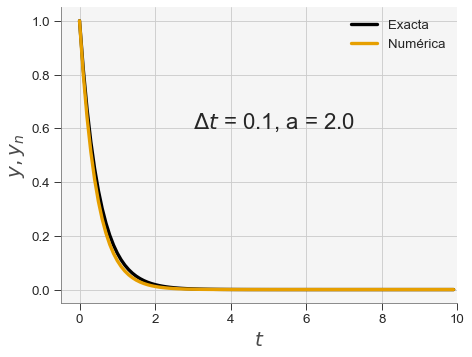

In [83]:
# Graficamos la solución
plt.plot(t, y, lw=3, label='Exacta')
plt.plot(t, yn, lw=3, label='Numérica')
#plt.scatter(t, yn, color='k', zorder=5)

plt.xlim(-0.5,10)
plt.xlabel('$t$', fontsize=18)
plt.ylabel('$y, y_n$', fontsize=18)

texto = '$\Delta t$ = {}, a = {}'.format(dt, a)
plt.text(3,0.6, texto, fontdict = {'fontsize':20})

plt.legend()
plt.show()

In [84]:
def solNumerica(a, Tmax, dt):
    N = int(Tmax / dt) 
    t = np.arange(0, Tmax, dt)
    y = exacta(a, t)
    N = len(t)
    yn = np.ones(N)

    # Algoritmo numérico
    for i in range(1,N):
        yn[i] = (1 - a * dt) * yn[i-1]

    # Graficación
    plt.plot(t, y, lw=3, label='Exacta')
    plt.plot(t, yn, lw=3, label='Numérica')
    plt.scatter(t, yn, color='k', zorder=5)

    plt.xlim(-0.5,10)
    plt.xlabel('$t$', fontsize=18)
    plt.ylabel('$y, y_n$', fontsize=18)

    texto = '$\Delta t$ = {}, a = {}'.format(dt, a)
    plt.text(3,0.6, texto, fontdict = {'fontsize':20})
    plt.legend()
    plt.show()

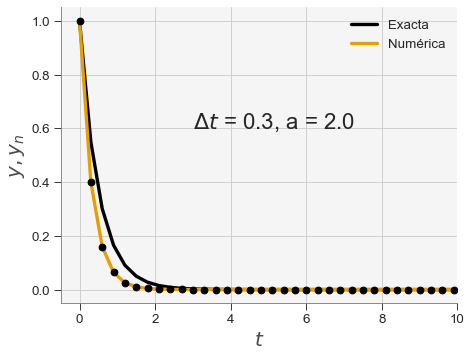

In [85]:
a = 2.0
dt = 0.3

solNumerica(a, Tmax, dt)

In [86]:
from ipywidgets import interact, fixed
import ipywidgets as widgets

In [87]:
w = interact(solNumerica, #a = 2.0, Tmax = 10, dt = 0.1)          
             a = widgets.FloatSlider(min=1, max=4, step=0.5, value=1),
             Tmax = fixed(Tmax),
             dt = widgets.FloatSlider(min=0.1, max=2.0, step=0.1, value=0.5))

display(w)

interactive(children=(FloatSlider(value=1.0, description='a', max=4.0, min=1.0, step=0.5), FloatSlider(value=0…

<function __main__.solNumerica(a, Tmax, dt)>